In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset (update the file path as per your location)
data = pd.read_csv('house_prediction_data.csv')

# Display the first few rows to verify the data
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# Drop any unnecessary columns like 'street', 'city', 'statezip', and 'country'
data = data.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

# Handle any missing values (if present)
data = data.dropna()

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target (house price)


In [7]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (helps for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Initialize regression models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

# Dictionary to store model results
models = {
    'Linear Regression': lr,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Gradient Boosting': gbr
}


In [11]:
# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print performance metrics
    print(f"--- {name} ---")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}\n")
    
    # Store results for comparison
    model_performance[name] = {'MSE': mse, 'R2': r2}


--- Linear Regression ---
Mean Squared Error (MSE): 986909084073.6285
R^2 Score: 0.032296292802739934

--- Random Forest ---
Mean Squared Error (MSE): 992622549898.0151
R^2 Score: 0.026694011753322422

--- Decision Tree ---
Mean Squared Error (MSE): 1051319334226.1763
R^2 Score: -0.030860525651950743

--- Gradient Boosting ---
Mean Squared Error (MSE): 982971581336.0924
R^2 Score: 0.03615717123389728



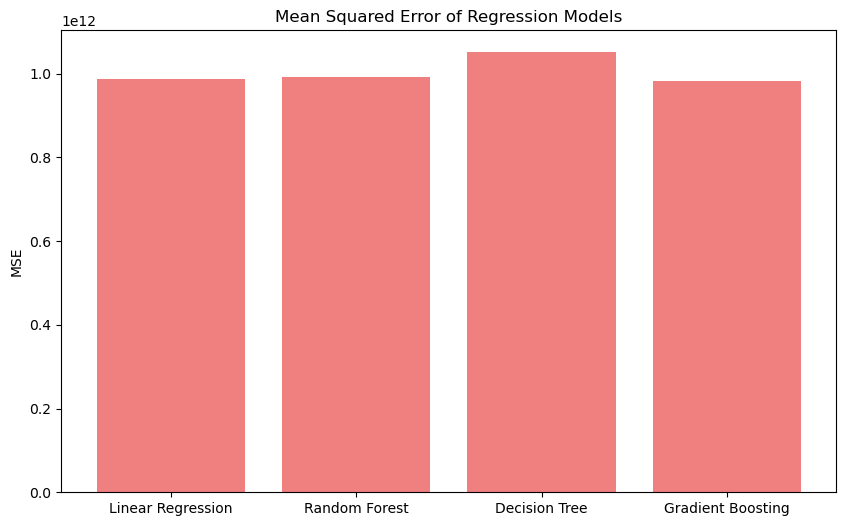

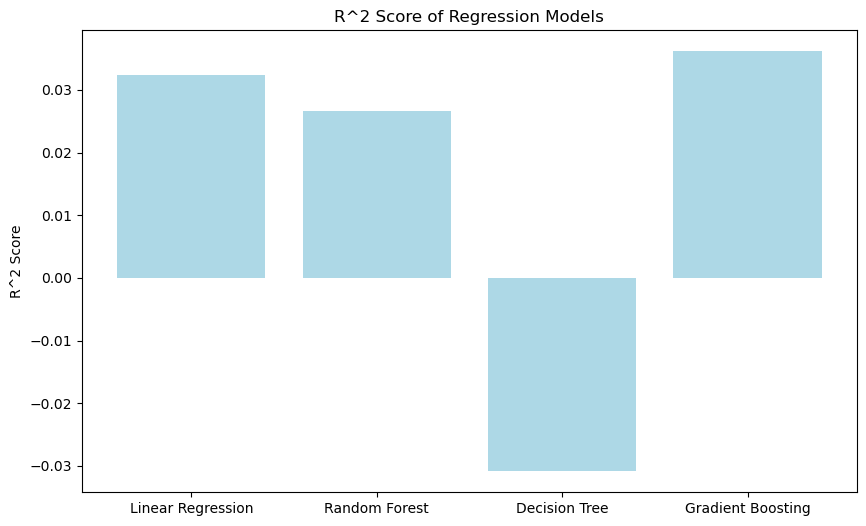

In [13]:
# Visualizing the performance of models using a bar chart
mse_values = [model_performance[model]['MSE'] for model in model_performance]
r2_values = [model_performance[model]['R2'] for model in model_performance]

# MSE Plot
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), mse_values, color='lightcoral')
plt.title('Mean Squared Error of Regression Models')
plt.ylabel('MSE')
plt.show()

# R^2 Score Plot
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), r2_values, color='lightblue')
plt.title('R^2 Score of Regression Models')
plt.ylabel('R^2 Score')
plt.show()


In [ ]:
# Visualize predictions vs actual prices for a specific model (e.g., Random Forest)
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='lightgreen')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.title('Random Forest: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
